# **Speech Emotion Recognition**
Problem Statement: The objective of this project is to develop a robust speech emotion recognition system capable of accurately classifying the emotional states conveyed in spoken language. By analyzing the acoustic features of speech signals, the system should be able to categorize emotions such as happiness, sadness, anger, fear, and more.

# **Importing Libraries:**

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import IPython.display as ipd
import warnings
import tensorflow as tf
from keras import utils
warnings.filterwarnings("ignore", category=UserWarning)

# **Fetching and Loading Dataset:**

In [2]:
pip install kaggle

In [3]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 421M/428M [00:02<00:00, 146MB/s]
100% 428M/428M [00:02<00:00, 158MB/s]


In [4]:
 #Unzip the dataset
!unzip toronto-emotional-speech-set-tess.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: /content/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: /content/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: /content/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: /content/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: /content/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: /content/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: /content/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: /content/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: /content/TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: /content/TESS Toro

In [ ]:
paths = []
labels = []

data_dir = '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data'
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [6]:
paths[:10]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_shirt_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_moon_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_rot_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_chair_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_chief_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_burn_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_back_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_fall_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotion

In [7]:
len(paths)

2800

In [8]:
labels[:10]

['sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad']

# **Creating DataFrame for Speech Data and Labels:**

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


# **Counting Labels:**

In [10]:
df['label'].value_counts()

,count
label,
sad,400
ps,400
neutral,400
angry,400
fear,400
happy,400
disgust,400



# **EDA [Explory Data Analysis]:**

<ipython-input-11-4def1a4d8387>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['label'], data=df, palette='dark')


<Axes: xlabel='label', ylabel='count'>

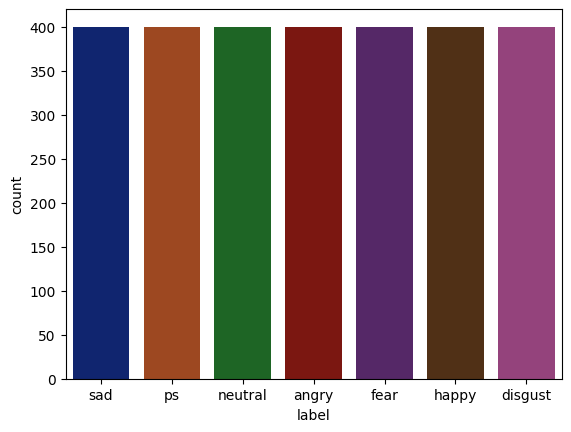

In [11]:
sns.countplot(x = df['label'], data=df, palette='dark')


# **Loading and Playing Audio Data:**

In [12]:
data, sampling_rate = librosa.load('/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_make_fear.wav')
ipd.Audio('/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_make_fear.wav')


# **Visualizing Audio Waveform:**

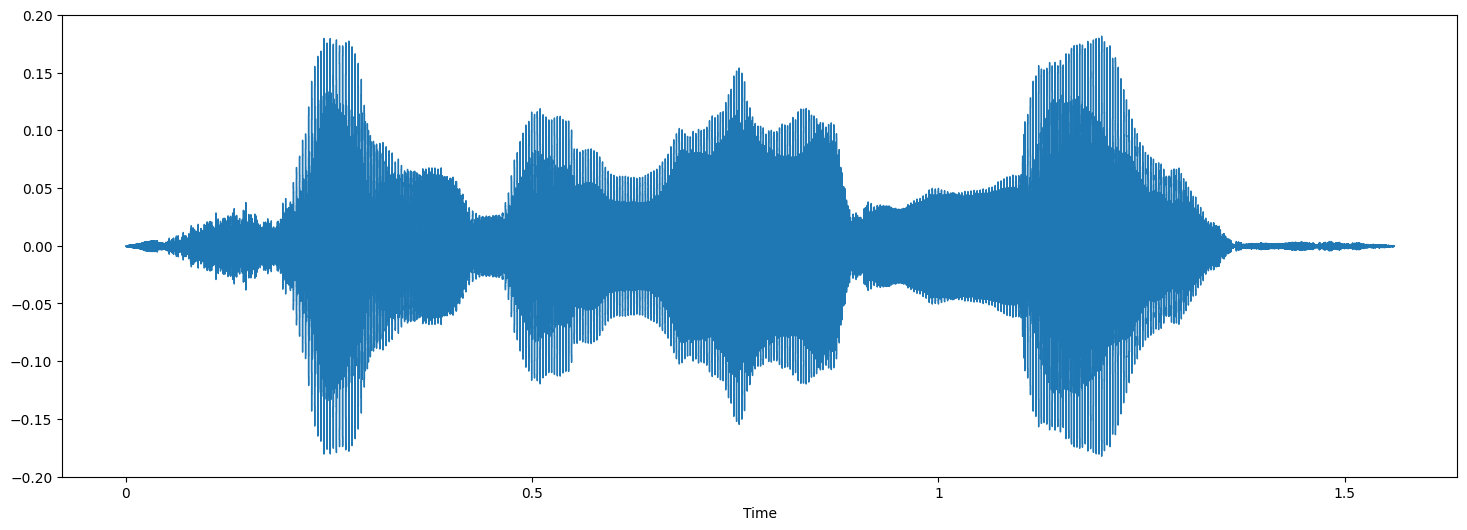

In [13]:
plt.figure(figsize=(18, 6))
librosa.display.waveshow(data, sr=sampling_rate)

# **Custom Functions for Audio Visualization:**

In [14]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    x_db = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

# **Fear Label Emotion Speech Analysis:**

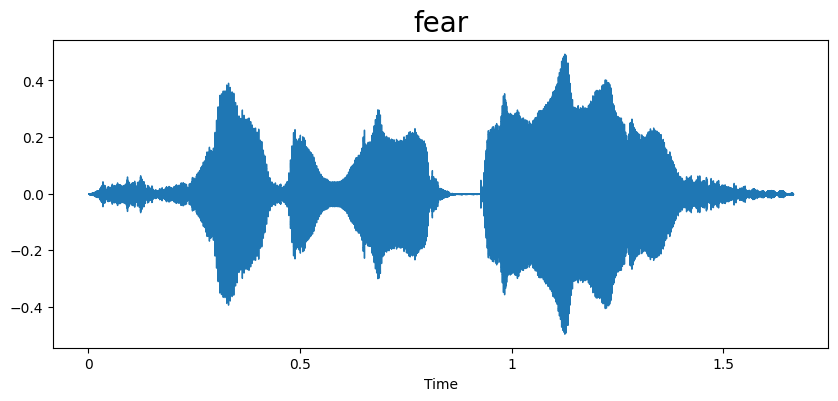

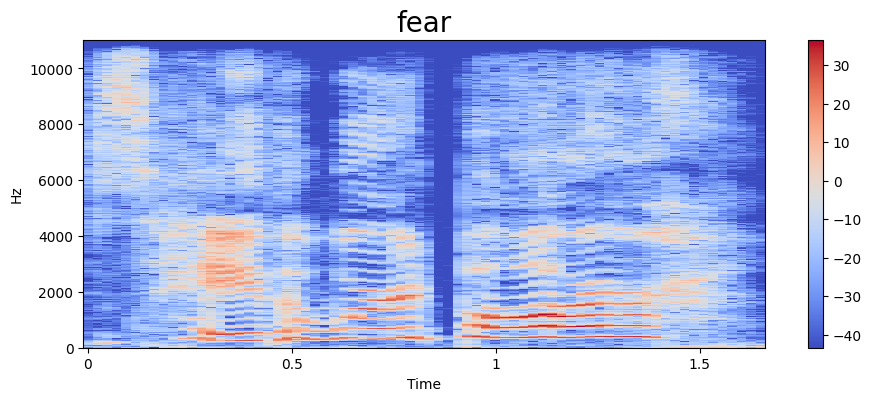

In [15]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **PS Label Emotion Speech Analysis:**

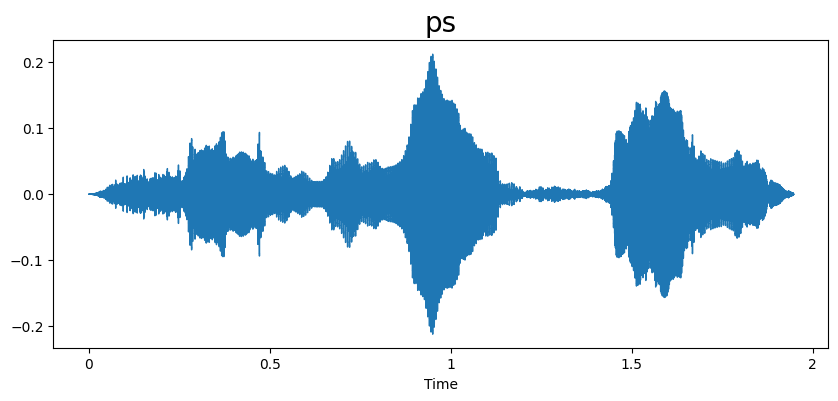

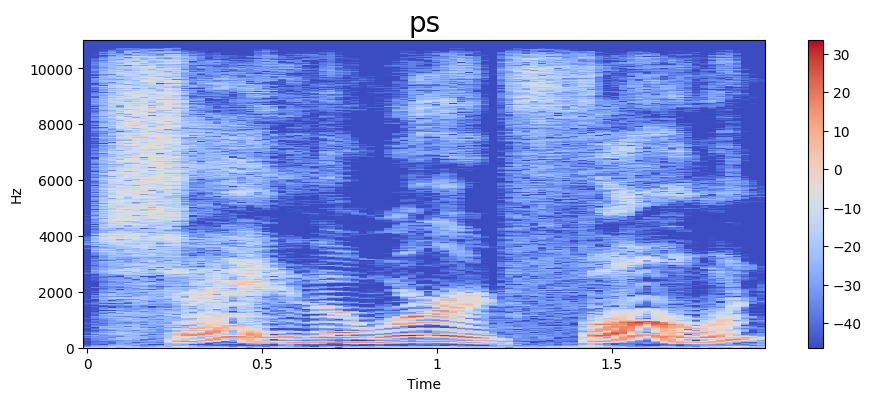

In [16]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Happy Label Emotion Speech Analysis:**

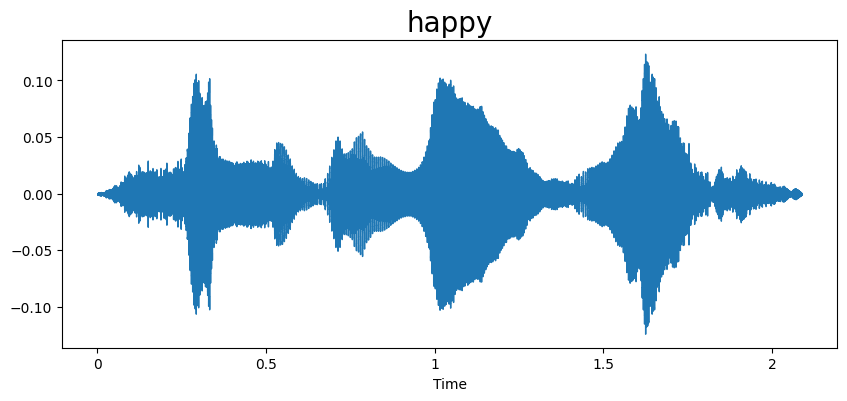

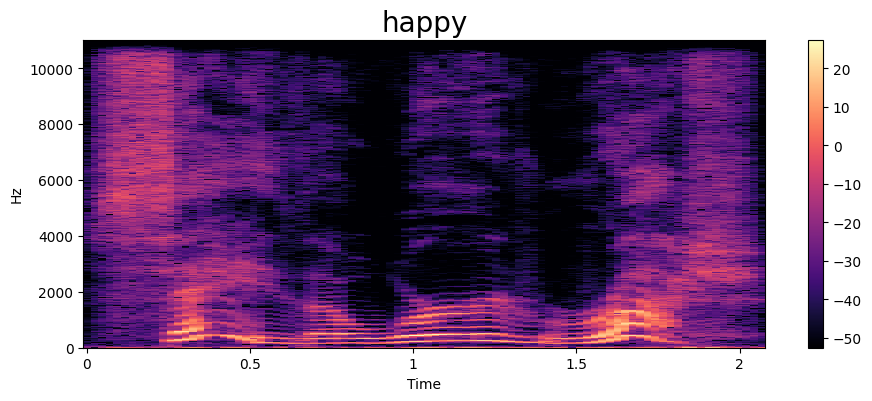

In [17]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Disgust Label Emotion Speech Analysis:**

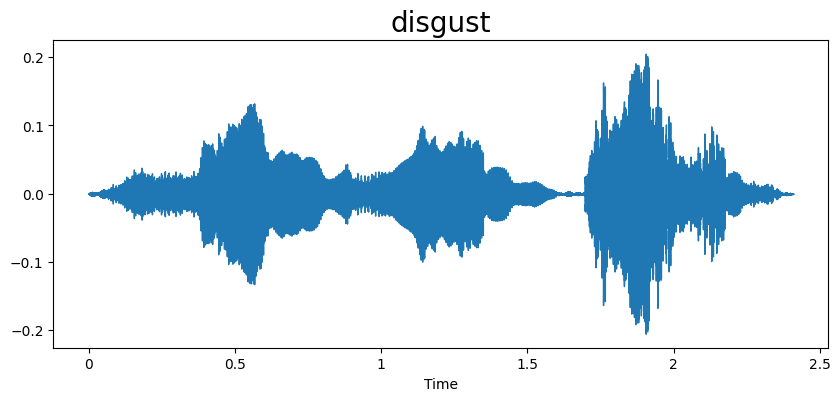

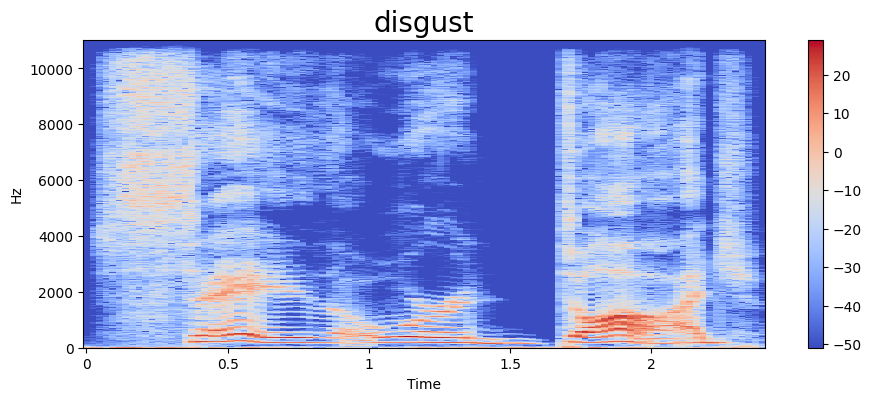

In [18]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Sad Label Emotion Speech Analysis:**

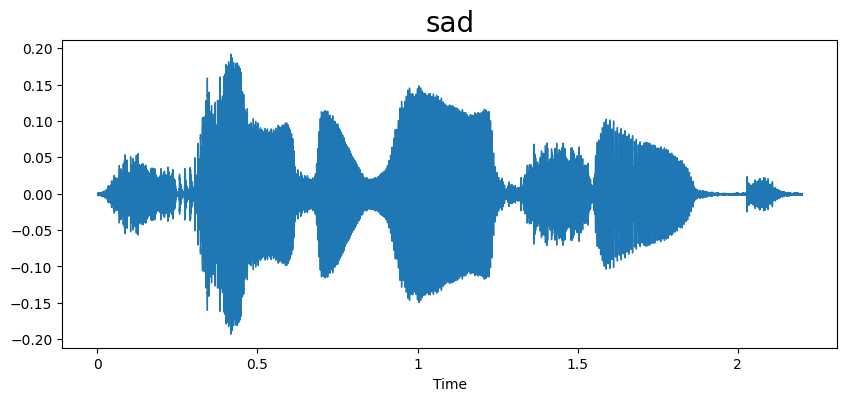

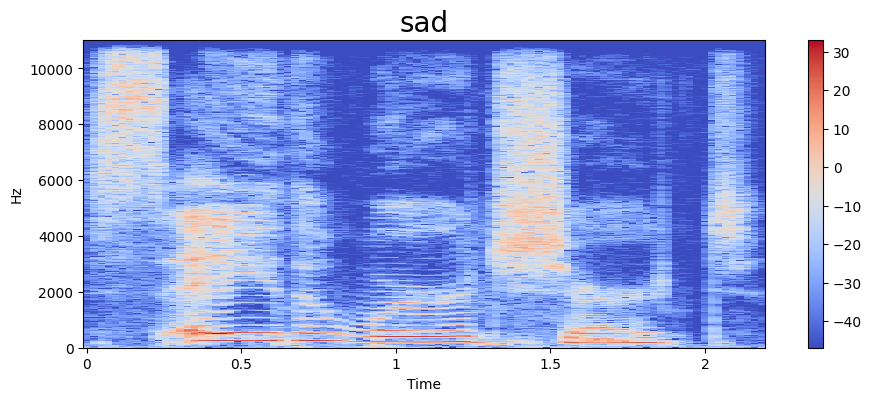

In [19]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


# **Angry Label Emotion Speech Analysis:**

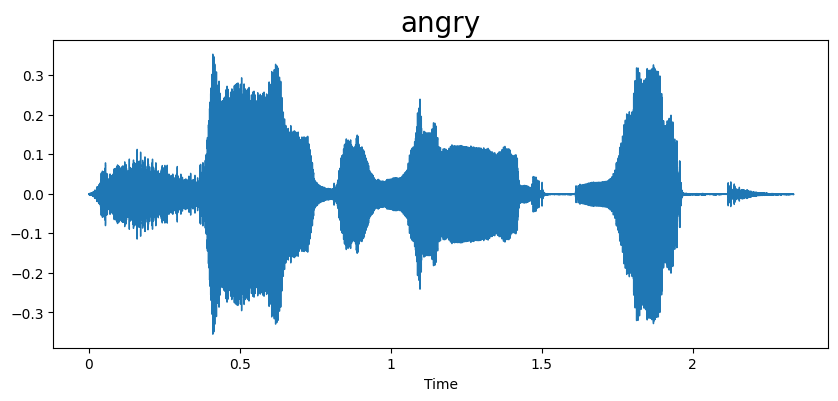

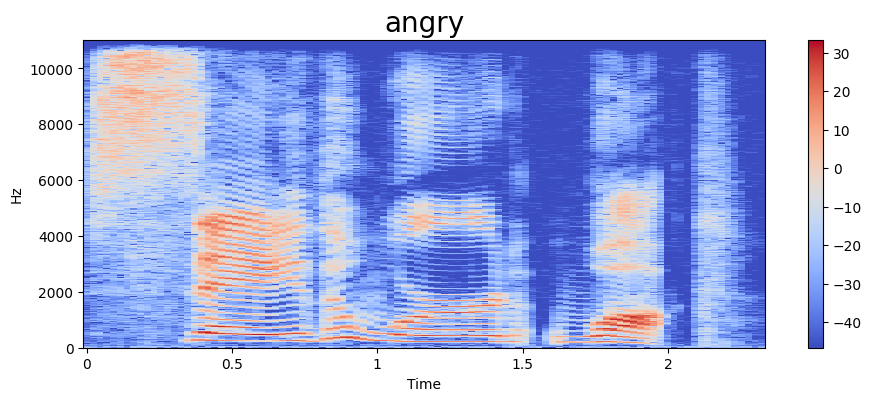

In [20]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Neutral Label Emotion Speech Analysis:**

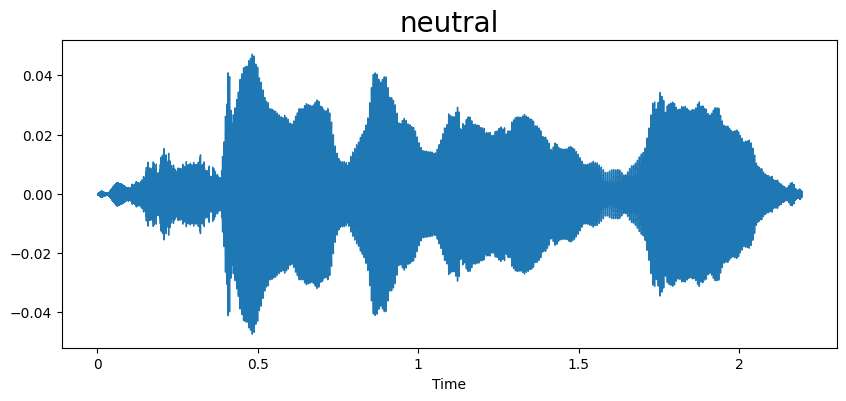

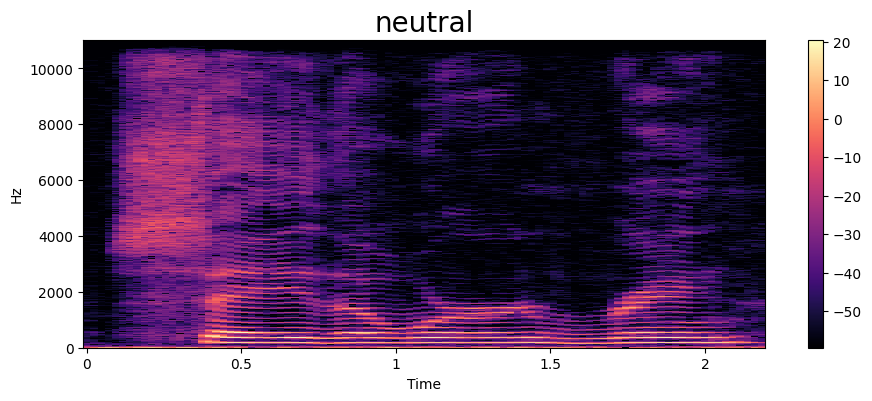

In [21]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Pie Chart: Emotion Distribution:**

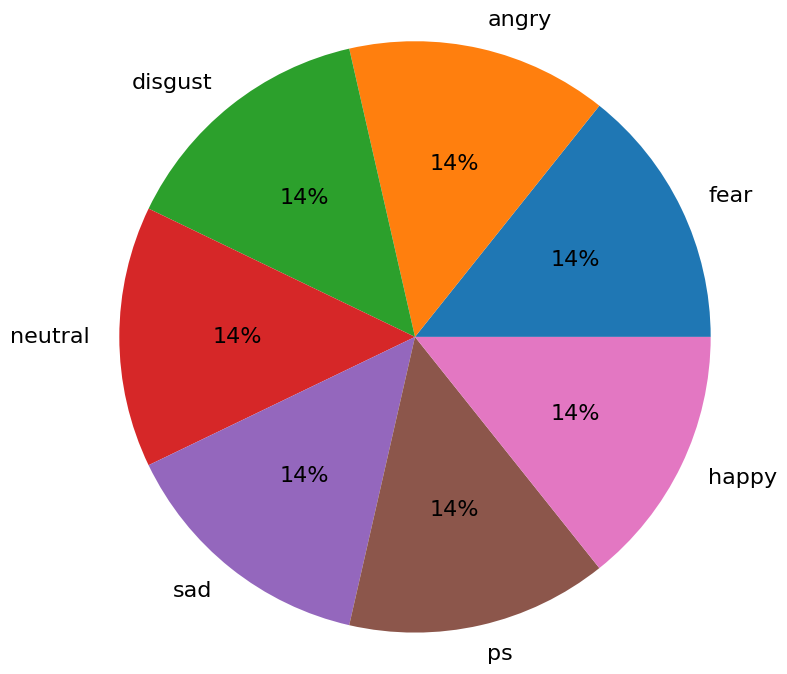

In [ ]:
labels = ["fear", "angry", "disgust", "neutral", "sad","ps", "happy"]
plt.pie(df['label'].value_counts(), labels = labels, autopct = '%.0f%%', radius= 2, textprops={'fontsize': 16})
plt.show()

# **Feature Extraction using MFCC (Mel-frequency cepstral coefficients):**

In [23]:
def feature_extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

In [ ]:
feature_extract_mfcc(df['speech'][0])

array([-401.29318   ,   71.42318   ,   17.588861  ,   34.414295  ,
          0.45294422,    9.525373  ,   -7.8672585 ,  -18.2576    ,
          4.2549467 ,   -6.983307  ,  -13.640876  ,    4.662364  ,
         -8.831436  ,    6.7889633 ,   -7.4564104 ,   -5.2966256 ,
          1.0049597 ,   -5.188053  ,   -8.2265    ,   -5.4704113 ,
         -5.227141  ,   -5.405132  ,   -9.985826  ,    3.1808152 ,
         -3.0242357 ,    5.502383  ,    4.374877  ,    3.3519309 ,
         -0.4207525 ,   -0.8680461 ,   -5.899468  ,    6.239931  ,
          6.259963  ,   15.1126375 ,    7.186408  ,    8.401688  ,
          1.8234708 ,    2.7107394 ,    0.55122226,    5.6885147 ],
      dtype=float32)

In [25]:
MFCC = df['speech'].apply(lambda x: feature_extract_mfcc(x))
MFCC

,speech
0,"[-401.29318, 71.42318, 17.588861, 34.414295, 0..."
1,"[-404.92566, 110.452705, 34.902668, 31.059631,..."
2,"[-407.0152, 97.73453, 22.76319, 30.531254, -6...."
3,"[-454.43314, 88.06056, 21.013117, 37.71676, 5...."
4,"[-476.7019, 66.64514, 31.977947, 44.795826, 5...."
...,...
2795,"[-425.67346, 88.4405, -6.3438396, 35.913273, -..."
2796,"[-386.32983, 120.576004, 2.8377826, 18.177639,..."
2797,"[-424.98175, 100.19008, -0.33041674, 36.05825,..."
2798,"[-437.69458, 107.2703, -8.190676, 12.115346, -..."


In [ ]:
X=[x for x in MFCC]
X=np.array(X)
X.shape

(2800, 40)

In [ ]:
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])
y= y.toarray()

In [29]:
y.shape

(2800, 7)

# **Splitting Data into Training and Testing Sets:**

In [30]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size= 0.20, random_state = 30)

# **Creating a Speech Emotion Recognition Model using LSTM:**

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
    ])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

# **Training the model:**

In [32]:
history = model.fit(x_train,y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3468 - loss: 1.6687 - val_accuracy: 0.7857 - val_loss: 0.6920
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7247 - loss: 0.6987 - val_accuracy: 0.9018 - val_loss: 0.3255
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9087 - loss: 0.2867 - val_accuracy: 0.9330 - val_loss: 0.2204
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9082 - loss: 0.2549 - val_accuracy: 0.9442 - val_loss: 0.1588
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9485 - loss: 0.1653 - val_accuracy: 0.9643 - val_loss: 0.1218
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9531 - loss: 0.1290 - val_accuracy: 0.9196 - val_loss: 0.2604
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9437 - loss: 0.1883 - val_accuracy: 0.9420 - val_loss: 0.1674
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9429 - loss: 0.1837 - val_accuracy: 0.9353 - va

# **Ploting the results:**

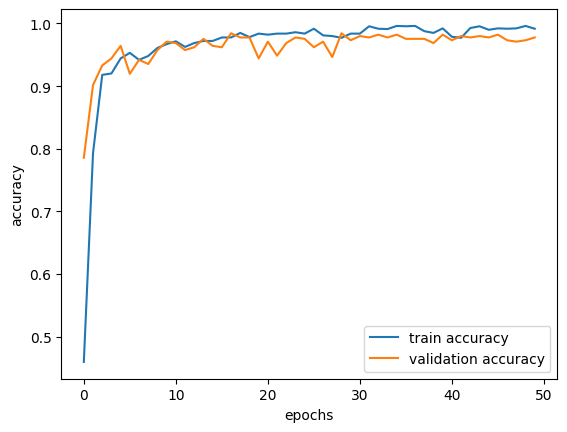

In [ ]:
epochs = list(range(50))

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, label='train accuracy')
plt.plot(epochs, val_accuracy, label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

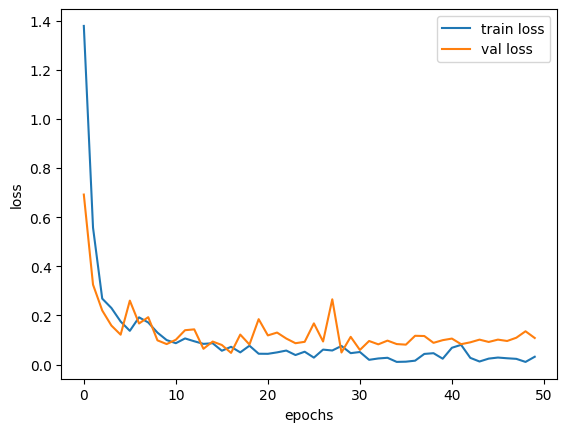

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [35]:
model.evaluate(x_train , y_train)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9989 - loss: 0.0072


[0.025493266060948372, 0.9946428537368774]

In [36]:
y_pred = model.predict(x_test, batch_size=5)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
accuracy_score=model.evaluate(x_test , y_test)
print ("Model evaluation accuracy: ", round(accuracy_score[1]*100),"%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9761 - loss: 0.1188
Model evaluation accuracy:  97 %


# **Saving the Trained Model:**

In [40]:
from google.colab import drive
drive.mount('/content/drive')

# Ensure the directory exists - create it if it doesn't
import os
save_dir = '/content/drive/MyDrive/Saving Moduel' # Corrected directory name if needed
os.makedirs(save_dir, exist_ok=True)

model.save(os.path.join(save_dir, 'model.keras'))  # Save within the created/existing directory

Mounted at /content/drive


In [42]:
import os

# Define the directory path
save_dir = 'Speech Emotion Recognition Project'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the model
model.save(os.path.join(save_dir, 'model.keras'))

In [43]:
model.save("Trained_model.keras")
model.save("Trained_model.h5")

In [44]:
model.save('/content/drive/MyDrive/Saving Moduel/model.keras') # Adds the .keras extension to the filepath, saving the model in the recommended Keras format.

In [45]:
model_name = 'emotion_speech_recognition_model_lstm.h5'
save_dir = os.path.join(os.getcwd(), 'train_model')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save('/content/train_model/emotion_speech_recognition_model_lstm.keras')
print('Saved the trained model at %s ' % model_path)

Saved the trained model at /content/train_model/emotion_speech_recognition_model_lstm.h5 


# **Saving the Model Architecture as JSON:**

In [46]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# **Loading the Trained Model from JSON and Weights:**

In [47]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("/content/train_model/emotion_speech_recognition_model_lstm.keras")
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
compile_metrics: 97.32%


# **Predicting Emotions using the Loaded Model:**

In [48]:
pred = loaded_model.predict(x_test, batch_size=32, verbose=1)
pred

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[4.6766022e-06, 9.9997330e-01, 8.0867338e-08, ..., 6.5469852e-09,
        1.3351858e-05, 4.0880045e-06],
       [7.5876665e-06, 1.4799560e-04, 6.0948673e-06, ..., 1.4633759e-05,
        9.9067843e-01, 1.2639100e-05],
       [9.9999869e-01, 7.0002818e-07, 2.9585859e-08, ..., 6.3803576e-08,
        2.4545312e-07, 7.8708347e-08],
       ...,
       [9.8823402e-05, 5.7146342e-05, 3.3258576e-07, ..., 4.7836775e-06,
        9.9978203e-01, 9.8123422e-08],
       [4.9802917e-10, 2.5498833e-13, 3.8090947e-10, ..., 1.0000000e+00,
        2.7474026e-12, 7.8171844e-14],
       [2.6180674e-06, 6.4374915e-05, 1.5391654e-05, ..., 8.4407283e-08,
        3.7954026e-04, 2.1618058e-05]], dtype=float32)

In [49]:
_pred=pred.argmax(axis=1)
_pred

array([1, 5, 0, 3, 0, 4, 5, 1, 4, 2, 2, 1, 0, 0, 4, 5, 1, 0, 1, 2, 0, 3,
       3, 3, 5, 4, 4, 3, 1, 6, 0, 1, 6, 4, 0, 1, 0, 4, 5, 1, 3, 4, 3, 4,
       3, 1, 4, 0, 6, 0, 2, 2, 5, 4, 5, 3, 1, 2, 4, 6, 0, 1, 4, 5, 5, 2,
       0, 1, 1, 3, 4, 5, 6, 3, 3, 1, 4, 1, 3, 4, 1, 4, 3, 2, 4, 0, 1, 0,
       5, 5, 0, 4, 5, 1, 4, 2, 4, 6, 0, 5, 4, 1, 6, 6, 3, 4, 5, 5, 4, 1,
       0, 6, 2, 5, 2, 5, 1, 3, 5, 1, 6, 2, 2, 4, 5, 6, 4, 3, 0, 0, 1, 4,
       4, 2, 4, 5, 4, 1, 3, 4, 5, 6, 2, 3, 2, 2, 5, 4, 1, 6, 6, 6, 0, 5,
       6, 1, 4, 0, 4, 0, 2, 6, 2, 0, 5, 4, 1, 1, 4, 2, 3, 1, 0, 2, 5, 4,
       3, 4, 2, 4, 1, 0, 4, 2, 3, 1, 2, 3, 0, 6, 5, 3, 0, 2, 2, 2, 3, 1,
       5, 5, 1, 3, 0, 5, 0, 2, 4, 1, 0, 5, 1, 4, 4, 3, 5, 1, 0, 4, 4, 5,
       0, 1, 4, 6, 0, 5, 3, 0, 3, 4, 1, 0, 3, 5, 2, 2, 5, 3, 3, 1, 1, 5,
       4, 4, 0, 1, 2, 6, 2, 2, 3, 3, 0, 6, 0, 4, 4, 3, 1, 3, 6, 1, 5, 1,
       2, 0, 4, 3, 4, 5, 3, 5, 3, 3, 0, 4, 4, 0, 2, 4, 6, 1, 5, 6, 6, 1,
       2, 2, 5, 3, 6, 5, 3, 0, 5, 4, 1, 1, 5, 0, 4,

In [50]:
z = _pred.astype(int).flatten()
prediction = (encoder.inverse_transform(z.reshape(-1, 7)))
pred_data = pd.DataFrame({'Predicted Values': prediction.flatten()})
pred_data[:10]

,Predicted Values
0,disgust
1,disgust
2,disgust
3,happy
4,disgust
5,happy
6,sad
7,happy
8,happy
9,angry


# **Displaying Predicted Emotions for Test Data:**

In [51]:
actual=y_test.argmax(axis=1)
yz = actual.astype(int).flatten()
actual_values = (encoder.inverse_transform((yz.reshape(-1, 7))))
actual_data = pd.DataFrame({'actual values': actual_values.flatten()})
actual_data[:10]

,actual values
0,disgust
1,disgust
2,disgust
3,happy
4,disgust
5,happy
6,sad
7,happy
8,happy
9,angry


In [52]:
final_data = actual_data.join(pred_data)

# **Actual vs Predicted Emotions:**

In [53]:

final_data[:15]

,actual values,Predicted Values
0,disgust,disgust
1,disgust,disgust
2,disgust,disgust
3,happy,happy
4,disgust,disgust
5,happy,happy
6,sad,sad
7,happy,happy
8,happy,happy
9,angry,angry


In [54]:
final_data.groupby('Predicted Values').count()

,actual values
Predicted Values,
angry,18
disgust,16
fear,13
happy,13
neutral,7
ps,5
sad,8


# **Visualizing Confusion Matrix:**

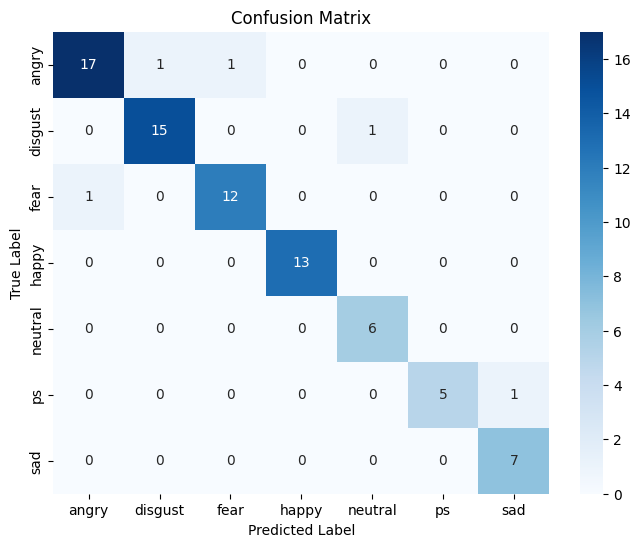

In [55]:
from sklearn.metrics import confusion_matrix
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']

cm = confusion_matrix(actual_data, pred_data)

cm_df = pd.DataFrame(cm, index=emotions, columns=emotions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()